In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet("./../../../resulting data/verses_features.parquet")

In [3]:
df.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(31065, 4167)

In [5]:
df["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [6]:
df.fillna(0, inplace=True)

In [7]:
df.columns.tolist()[0:10]

['bible_identifier',
 'bible_book',
 'bible_chapter',
 'bible_book_chapter',
 'genre',
 'twitter_freq_sum_2014_2015',
 'twitter_freq_2014',
 'twitter_freq_2015',
 'relations',
 'monogamy']

In [8]:
structural_features = df.columns.tolist()[265:297]


In [9]:
sexual_features = df.columns.tolist()[8:262]

In [10]:
len(df)

31065

In [11]:
entities_features = df.columns.tolist()[262:265] + df.columns.tolist()[298:len(df)]

In [12]:
df.loc[df["bible_identifier"] == "b.SON.001.010"]["#per39"]

17547    1.0
Name: #per39, dtype: float64

In [13]:
df.describe()

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
count,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.0,31065.000000,...,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000
mean,2286.298793,1366.727797,919.570996,0.000225,0.000193,0.000515,0.001610,0.000064,0.0,0.000032,...,0.000418,0.000064,0.000032,0.000032,0.000064,0.000097,0.000032,0.000869,0.000129,0.000032
std,12282.503644,8274.810650,4428.844891,0.015010,0.013896,0.022689,0.040087,0.008024,0.0,0.005674,...,0.030551,0.008024,0.005674,0.005674,0.011347,0.017021,0.005674,0.034501,0.022695,0.005674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,32.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,115.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,941.000000,507.000000,415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,875311.000000,613161.000000,262150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000


In [14]:
rel_books_df = books_df.div(books_df["number of verses"], axis="index")

NameError: name 'books_df' is not defined

In [ ]:
rel_books_df

In [52]:
entities_df = pd.read_excel("./../../../entities.xls")


In [53]:
entities_df.index = entities_df["id"]


# Visualizations

In [54]:
sexual_features

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'indirect-ascendant-descendant',
 'acts',
 'social-related-act',
 'wedding',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'sexual-act',
 'sexual-act-stage',
 'seduction',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-masturbation',
 'masturbation',
 'oral-sex',
 'anal-sex',
 'non-penetrative-sex',
 'female-rape',
 'male-rape',
 'sexual-assault',
 'female-sexual-assault',
 'male-sexual-assault',
 'sexual-deception',


In [55]:
df[['blessed-aspect',
 'positive-aspect',
 'neutral-aspect',
 'negative-aspect',
 'condemned-aspect']]

,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect
bible_identifier,,,,,
b.GEN.001.001,0,0,0,0,0
b.GEN.001.002,0,0,0,0,0
b.GEN.001.003,0,0,0,0,0
b.GEN.001.004,0,0,0,0,0
b.GEN.001.005,0,0,0,0,0
...,...,...,...,...,...
b.REV.022.017,0,0,0,0,0
b.REV.022.018,0,0,0,0,0
b.REV.022.019,0,0,0,0,0


In [106]:
df['blessed-aspect-nr'] = df['blessed-aspect'] * 5

In [107]:
df['positive-aspect-nr'] = df['blessed-aspect'] * 4

In [108]:
df['neutral-aspect-nr'] = df['blessed-aspect'] * 3

In [109]:
df['negative-aspect-nr'] = df['negative-aspect'] * 2

In [110]:
df['condemned-aspect-nr'] = df['condemned-aspect'] * 1

In [111]:
df.columns.tolist()[-5:]

['positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr',
 'sum-aspects']

In [112]:
df["sum-aspects"] =  df[['blessed-aspect-nr',
 'positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr']].sum(axis=1)

In [113]:
df

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#pla67,#org52,#per129,#pla74,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,sum-aspects
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.002,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.003,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.004,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.005,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.REV.022.018,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.REV.022.019,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


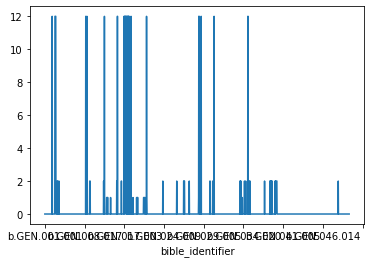

In [114]:
df.loc[df["bible_book"]== "GEN"]["sum-aspects"].T.plot.line()

In [115]:
books_df = df.groupby("bible_book").sum()
books_df["number of verses"] = df.groupby("bible_book").count().iloc[:,0].values.tolist()
books_df = books_df.loc[df["bible_book"].unique()]


In [116]:
books_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org52,#per129,#pla74,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,sum-aspects,number of verses
bible_book,,,,,,,,,,,,,,,,,,,,,
GEN,938570,467676,470894,0,1,10,18,0,0,0,...,0.0,0.0,0.0,190,152,114,92,26,574,1533
EXO,532548,256961,275587,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,1213
LEV,206505,91530,114975,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,859
NUM,191596,95279,96317,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,1288
DEU,568536,335272,233264,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1JO,1595001,1043423,551578,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,105
2JO,23028,14143,8885,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,13
3JO,48185,27678,20507,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,14


In [117]:
chapters_df = df.groupby("bible_book_chapter").sum()

In [118]:
chapters_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#pla67,#org52,#per129,#pla74,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,sum-aspects
bible_book_chapter,,,,,,,,,,,,,,,,,,,,,
1CH.001,15463,3959,11504,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1CH.002,20447,10639,9808,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1CH.003,8855,1347,7508,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1CH.004,13277,7996,5281,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1CH.005,2081,799,1282,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEC.013,3109,1785,1324,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
ZEC.014,9845,4703,5142,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
ZEP.001,4407,2138,2269,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [119]:
chapters_df["bible_book"] = chapters_df.index.str[0:3]

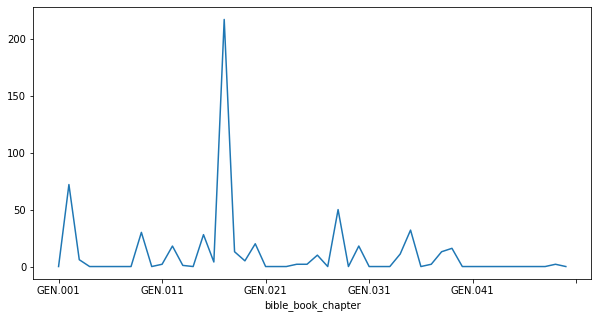

In [120]:


chapters_df.loc[chapters_df["bible_book"]== "GEN"]["sum-aspects"].T.plot.line(figsize = (10,5))

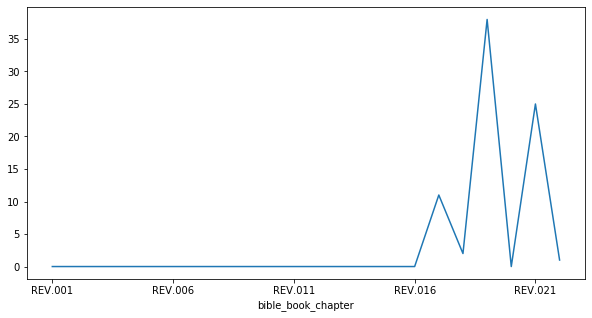

In [121]:


chapters_df.loc[chapters_df["bible_book"]== "REV"]["sum-aspects"].T.plot.line(figsize = (10,5))

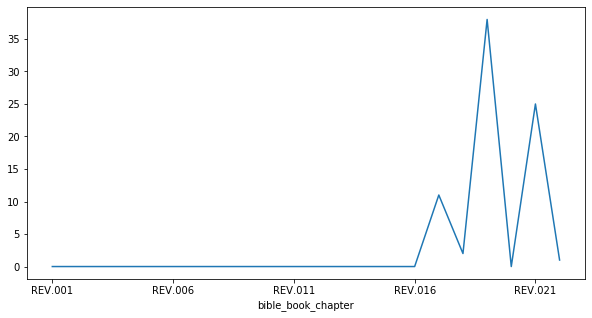

In [122]:
chapters_df.loc[chapters_df["bible_book"]== "REV"]["sum-aspects"].T.plot.line(figsize = (10,5))

In [123]:
df.loc[df["sum-aspects"] != 0]["bible_book"].unique()

array(['GEN', 'RUT', 'SON', 'MAT', 'JOH', '1CO', 'REV'], dtype=object)

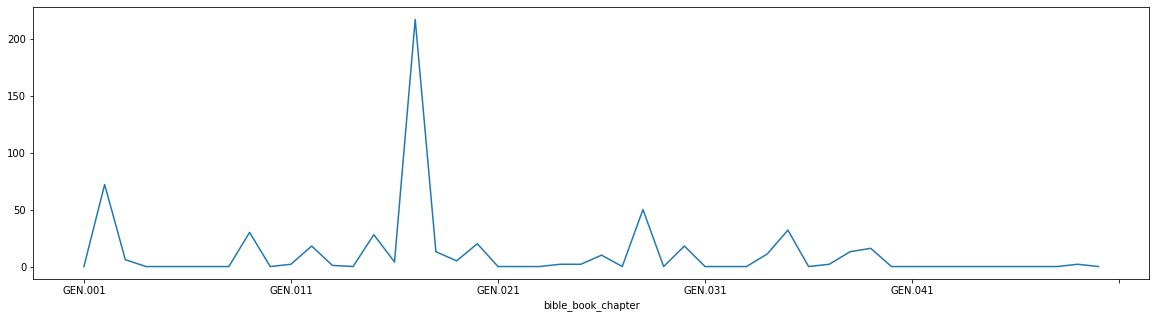

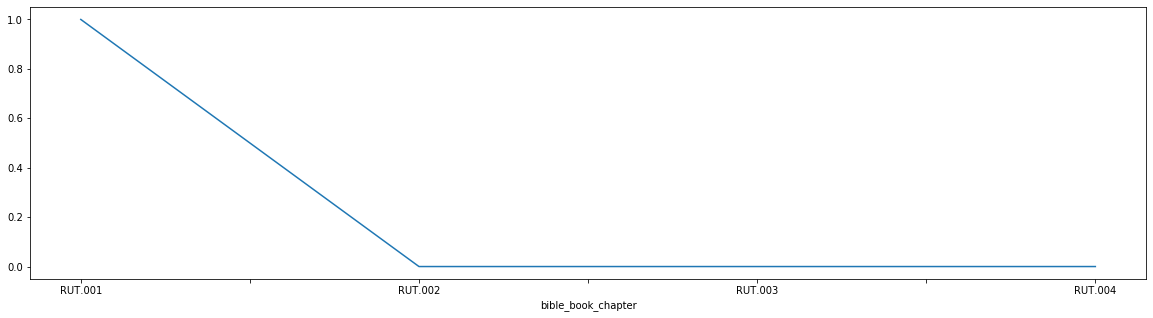

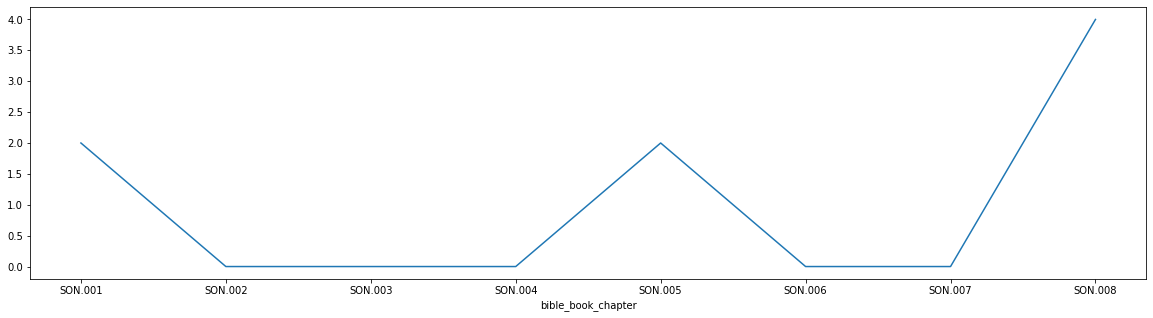

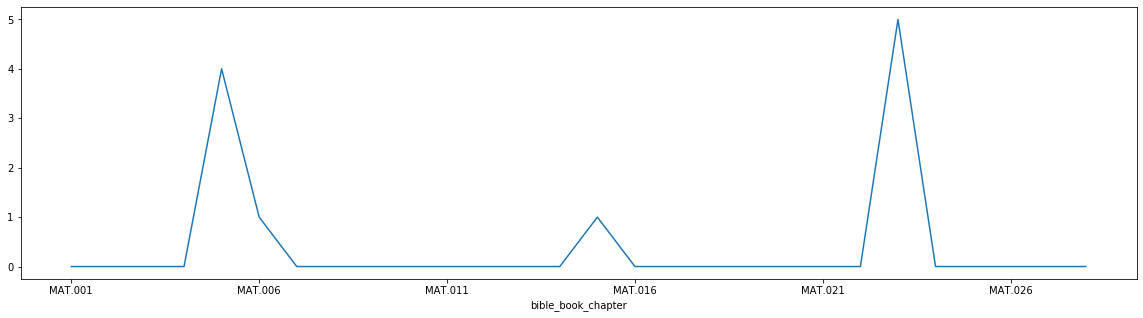

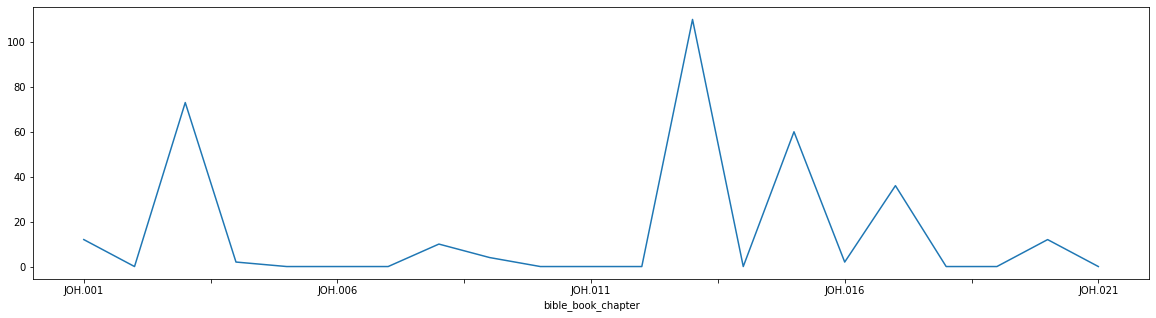

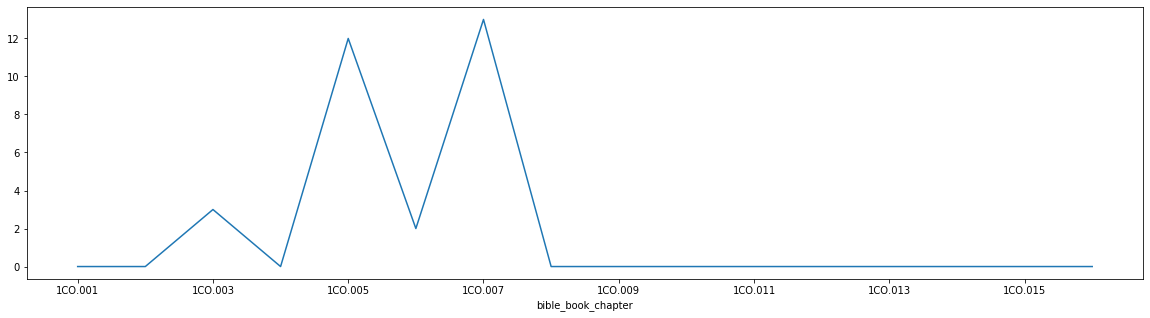

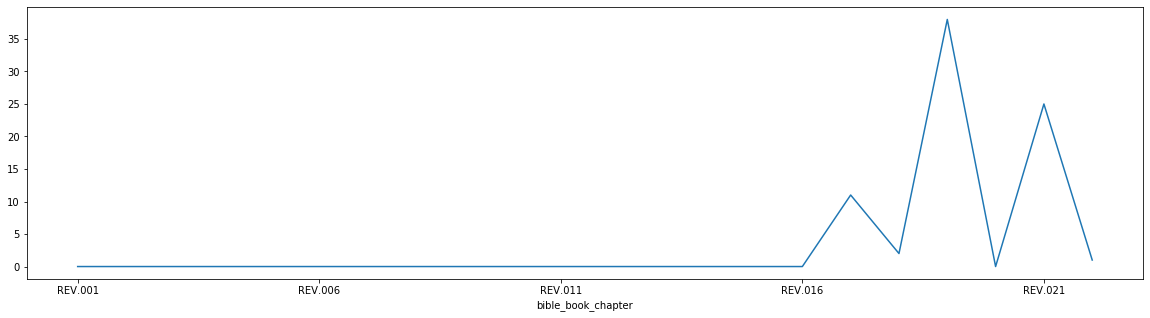

In [124]:
for book in df.loc[df["sum-aspects"] != 0]["bible_book"].unique().tolist():
    chapters_df.loc[chapters_df["bible_book"]== book]["sum-aspects"].T.plot.line(figsize = (20,5))
    plt.show()


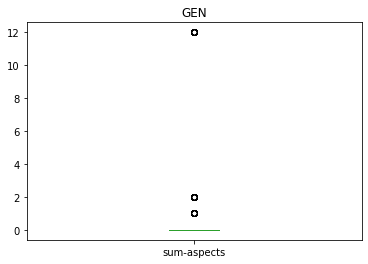

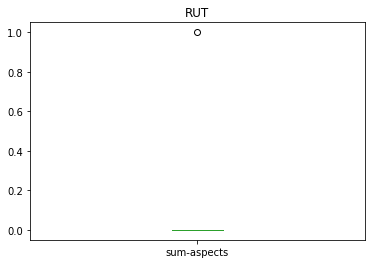

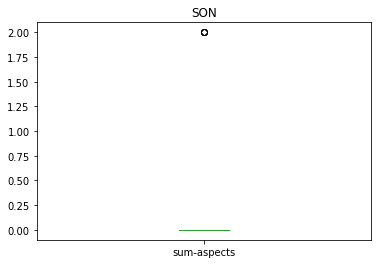

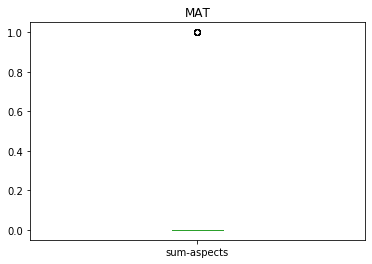

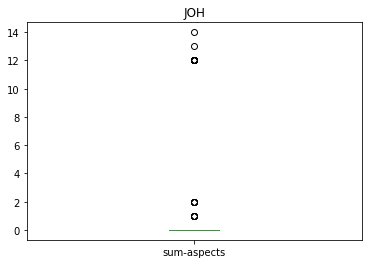

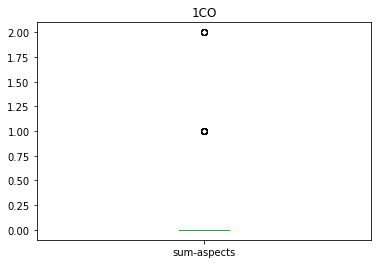

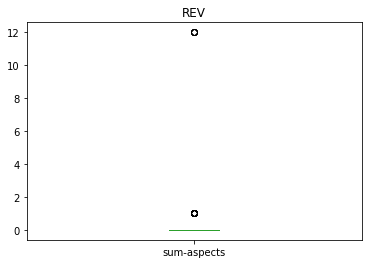

In [125]:
for book in df.loc[df["sum-aspects"] != 0]["bible_book"].unique().tolist():
    df.loc[df["bible_book"]== book]["sum-aspects"].T.plot.box(title = book)
    plt.show()


In [76]:
df

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#pla67,#org52,#per129,#pla74,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,sum-aspects
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.002,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.003,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.004,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.005,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.REV.022.018,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.REV.022.019,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [77]:
df

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#pla67,#org52,#per129,#pla74,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,sum-aspects
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.002,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.003,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.004,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.GEN.001.005,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.REV.022.018,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
b.REV.022.019,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [78]:
df.index = df["bible_identifier"]

In [79]:
sexual_afeatures = sexual_features + ["sum-aspects"] + ['blessed-aspect-nr',
 'positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr']

In [94]:
sexual_features = sexual_features[0:-6]

In [95]:
sexual_features

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'indirect-ascendant-descendant',
 'acts',
 'social-related-act',
 'wedding',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'sexual-act',
 'sexual-act-stage',
 'seduction',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-masturbation',
 'masturbation',
 'oral-sex',
 'anal-sex',
 'non-penetrative-sex',
 'female-rape',
 'male-rape',
 'sexual-assault',
 'female-sexual-assault',
 'male-sexual-assault',
 'sexual-deception',


In [96]:
sexual_thems_df = df.loc[df["bible_book"].isin(df.loc[df["sum-aspects"] != 0]["bible_book"].unique().tolist())][sexual_features]

In [97]:
sexual_thems_df

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.REV.022.018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.REV.022.019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
sexual_thems_df["sum-aspects"]

bible_identifier
b.GEN.001.001    0
b.GEN.001.002    0
b.GEN.001.003    0
b.GEN.001.004    0
b.GEN.001.005    0
                ..
b.REV.022.017    0
b.REV.022.018    0
b.REV.022.019    0
b.REV.022.020    0
b.REV.022.021    0
Name: sum-aspects, Length: 4526, dtype: int64

In [99]:
for index, row in sexual_thems_df.loc[sexual_thems_df["sum-aspects"] != 0 ].iterrows():
    sum_value = row["sum-aspects"]
    sexual_thems_df.loc[index,row[row != 0].index] = sum_value


In [100]:
sexual_thems_df

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.REV.022.018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.REV.022.019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
row[row != 0].index()

TypeError: 'Index' object is not callable

In [102]:
sexual_thems_df.loc[sexual_thems_df.index.str.contains("GEN")]

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.001.005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.GEN.050.022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.050.023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b.GEN.050.024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
sexual_thems_df.loc[sexual_thems_df["second-marriage"] != 0]

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,neutral-aspect,negative-aspect,condemned-aspect,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,book
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.1CO.007.011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1CO
b.1CO.007.015,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1CO


In [103]:
sexual_thems_df["book"] = sexual_thems_df.index.str[2:5]

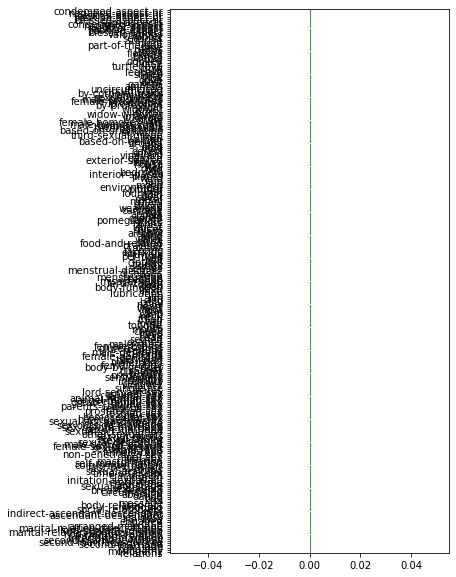

In [104]:
sexual_thems_df.loc[sexual_thems_df["book"].isin(df.loc[df["sum-aspects"] != 0]["bible_book"].unique().tolist())].iloc[1:10].plot.box(vert=False, figsize = (5, 10))